# **Prediksi Risiko Kecelakaan - Decision Tree Cart**

Model prediksi seseorang berisiko kecelakaan lalu lintas berdasarkan kondisi jalan dan pengemudi.

## 1. Data Preparation

### 1.1 Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk

### 1.2 Read Dataset

In [2]:
# Import dataset
df = pd.read_csv('dataset_traffic_accident_prediction1.csv')

In [3]:
# 5 baris teratas
print("5 baris teratas:\n")
df.head()

5 baris teratas:



,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [4]:
# 10 baris acak
print("10 baris acak:\n")
df.sample(10)

10 baris acak:



,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
68,Clear,Highway,Afternoon,2.0,80.0,3.0,0.0,Low,Dry,Car,52.0,43.0,Artificial Light,0.0
471,Clear,Highway,Night,1.0,120.0,5.0,0.0,Moderate,Wet,Car,NaN,67.0,Daylight,0.0
164,Clear,City Road,Afternoon,0.0,213.0,11.0,0.0,Low,Dry,Motorcycle,65.0,56.0,Daylight,1.0
485,Snowy,City Road,Morning,1.0,80.0,3.0,0.0,Low,Dry,Car,37.0,33.0,Daylight,NaN
749,Clear,Highway,NaN,2.0,60.0,1.0,1.0,Low,Dry,Car,36.0,27.0,Artificial Light,0.0
61,Rainy,NaN,Evening,1.0,50.0,2.0,0.0,Moderate,Under Construction,Car,67.0,58.0,No Light,0.0
89,Clear,City Road,Night,2.0,80.0,1.0,0.0,Low,Dry,Car,55.0,46.0,No Light,0.0
226,NaN,Highway,Night,1.0,60.0,2.0,0.0,Low,Icy,Car,24.0,17.0,Daylight,NaN
271,Rainy,City Road,Morning,0.0,50.0,3.0,0.0,High,Icy,Motorcycle,58.0,49.0,Artificial Light,0.0
28,Stormy,NaN,Afternoon,2.0,80.0,3.0,0.0,Moderate,Under Construction,Truck,60.0,57.0,Daylight,1.0


In [5]:
# Ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [6]:
# Ringkasan statistik
print('Ringkasan statistik:\n', df.describe())

Ringkasan statistik:
        Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
count       798.000000   798.000000          798.000000      798.000000   
mean          1.001253    71.050125            3.286967        0.160401   
std           0.784894    32.052458            2.017267        0.367208   
min           0.000000    30.000000            1.000000        0.000000   
25%           0.000000    50.000000            2.000000        0.000000   
50%           1.000000    60.000000            3.000000        0.000000   
75%           2.000000    80.000000            4.000000        0.000000   
max           2.000000   213.000000           14.000000        1.000000   

       Driver_Age  Driver_Experience    Accident  
count  798.000000         798.000000  798.000000  
mean    43.259398          38.981203    0.299499  
std     15.129856          15.273201    0.458326  
min     18.000000           9.000000    0.000000  
25%     30.000000          26.000000    0.00000

In [7]:
# Jumlah baris dan kolom
print('Jumlah baris :', df.shape[0])
print('Jumlah kolom :', df.shape[1])


Jumlah baris : 840
Jumlah kolom : 14


In [8]:
# Cek distribusi target
df['Accident'].value_counts()

Accident
0.0    559
1.0    239
Name: count, dtype: int64

### 1.3 Encode

Kami melakukan encoding dengan mengubah nilai unik pada fitur bertipe objek menjadi nilai indeks (numerik) agar model dapat memproses data tersebut.

#### 1.3.1 Cek Fitur Objek

In [9]:
print('Fitur dengan tipe data objek:', df.select_dtypes(include=['object']).columns)

Fitur dengan tipe data objek: Index(['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'],
      dtype='object')


#### 1.3.2 Encoding 

In [10]:
obj_cols = df.select_dtypes(include=['object']).columns

for col in obj_cols:
    # isi NaN dengan modus 
    mode_value = df[col].mode()[0]       
    df[col] = df[col].fillna(mode_value)

    # encoding
    df[col], uniques = pd.factorize(df[col])

In [11]:
df.sample(10)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
222,1,2,0,1.0,80.0,1.0,0.0,1,1,0,45.0,36.0,2,0.0
290,1,2,0,0.0,30.0,3.0,0.0,2,3,0,27.0,27.0,0,1.0
629,1,1,2,0.0,60.0,5.0,0.0,0,3,1,52.0,46.0,1,1.0
763,1,1,0,0.0,60.0,2.0,0.0,0,3,0,69.0,61.0,0,NaN
198,0,2,2,2.0,80.0,2.0,0.0,2,3,3,52.0,46.0,1,0.0
682,2,0,3,1.0,80.0,5.0,0.0,2,0,0,37.0,34.0,1,0.0
526,1,0,1,1.0,189.0,14.0,0.0,1,3,0,33.0,31.0,1,1.0
523,1,1,3,2.0,60.0,4.0,1.0,0,2,0,29.0,NaN,0,1.0
382,0,0,3,0.0,60.0,3.0,0.0,2,1,0,34.0,27.0,0,0.0
460,0,2,2,0.0,100.0,1.0,0.0,1,0,0,67.0,64.0,1,0.0


In [12]:
df['Accident'].unique()


array([ 0.,  1., nan])

### 1.4 Missing Value dan Data Duplikat

#### 1.4.1 Cek Missing Value

In [13]:
# Total missing value
print('Total missing value:', df.isnull().sum().sum())

Total missing value: 294


In [14]:
# Jumlah missing value perkolom
print('Jumlah missing value perkolom:\n', df.isnull().sum())

Jumlah missing value perkolom:
 Weather                  0
Road_Type                0
Time_of_Day              0
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity        0
Road_Condition           0
Vehicle_Type             0
Driver_Age              42
Driver_Experience       42
Road_Light_Condition     0
Accident                42
dtype: int64


In [15]:
# Cek baris missing value
df[df.isna().any(axis=1)]

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
1,1,1,1,NaN,120.0,3.0,0.0,1,0,1,49.0,43.0,0,0.0
10,2,2,2,NaN,60.0,2.0,0.0,1,3,0,33.0,28.0,0,NaN
14,1,1,0,0.0,NaN,1.0,0.0,0,3,0,61.0,57.0,0,0.0
15,1,1,1,0.0,60.0,5.0,0.0,0,0,1,46.0,NaN,0,0.0
17,4,2,3,1.0,100.0,3.0,0.0,0,2,3,53.0,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,1,0,3,2.0,50.0,NaN,0.0,1,3,0,20.0,19.0,1,0.0
831,4,2,0,0.0,30.0,2.0,1.0,1,2,0,NaN,39.0,0,0.0
833,0,1,3,0.0,NaN,4.0,0.0,1,3,0,53.0,45.0,1,0.0
834,0,0,2,0.0,60.0,NaN,1.0,0,2,0,33.0,27.0,0,NaN


#### 1.4.2 Penanganan Missing Value

In [16]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns

df[num_col] = df[num_col].fillna(df[num_col].median())

In [17]:
df.isnull().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

#### 1.4.3 penanganan nilai duplikat

In [20]:
df.duplicated().sum()

np.int64(18)

In [21]:
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

np.int64(0)

### 1.5 Deteksi Outlier

#### 1.5.1 Visualisasi Outlier

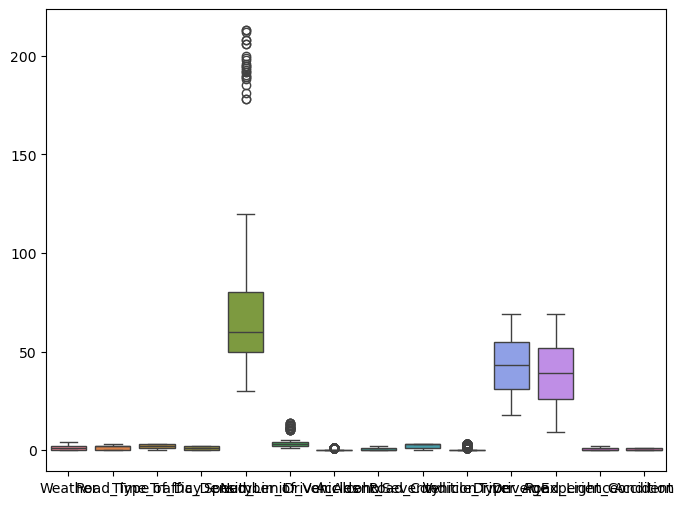

In [19]:
# boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df)
plt.show()

Fitur batas kecepatan resmi memiliki outlier ke atas dengan nilai kecepatan yang jauh lebih tinggi dari mayoritas.

#### 1.5.2 Penanganan Outlier

Kami menggunakan teknik clip untuk menangani outlier.

In [23]:
df.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [24]:
# Menangani nilai outlier pada kolom tertentu
cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 'Vehicle_Type']

df[cols] = df[cols].apply(lambda col: col.clip(upper=col.quantile(0.95)))

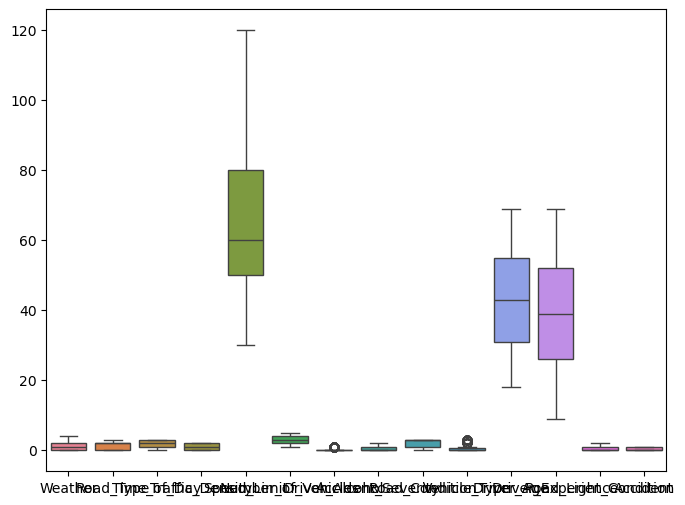

In [25]:
# boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df)
plt.show()

Setelah ditangani, nilai outlier semakin mengecil.

## 2. Exploratory Data Analysis

### 2.1 Distribusi Target

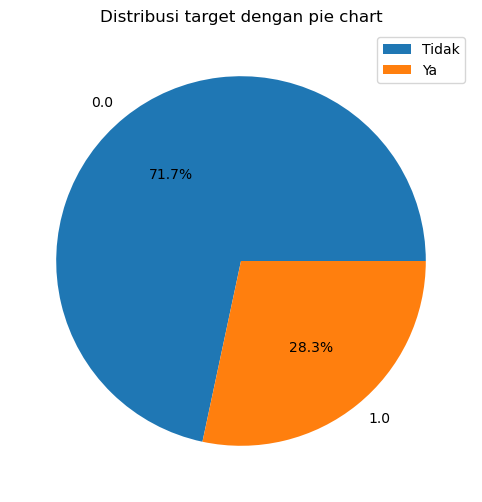

In [48]:
plt.figure(figsize=(8,6))
plt.title('Distribusi target dengan pie chart')
plt.pie(df['Accident'].value_counts(), labels=df['Accident'].value_counts().index, autopct='%1.1f%%')
plt.legend(['Tidak','Ya'])
plt.show()

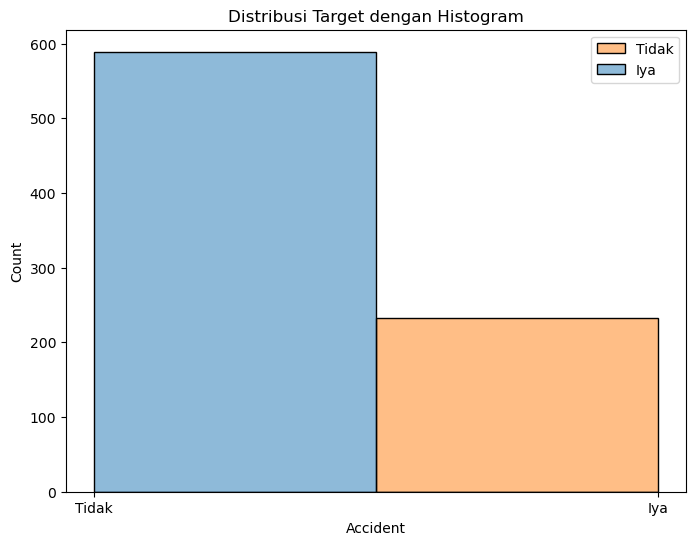

In [35]:
plt.figure(figsize=(8,6))
plt.title('Distribusi Target dengan Histogram')
sns.histplot(data=df, x='Accident', hue='Accident', bins=2)
plt.xticks([0,1], ['Tidak', 'Iya'])
plt.legend(labels=['Tidak', 'Iya'])
plt.show()

Dari grafik, penyebaran target ternyata tidak seimbang (immbalance). Dengan, hasil dari target teryata yang tidak berisiko, nilainya hampir 3/4 dari total target.

## 3. Modeling

In [27]:
# Fitur nilai numerik
continuous_features = ['Traffic_Density','Speed_Limit','Number_of_Vehicles',
                       'Driver_Alcohol','Driver_Age','Driver_Experience']

### 3.1 Variabel Independent dan Dependent

In [28]:
X = df[continuous_features].values
y = df['Accident'].values

### 3.2 Split Data

In [29]:
idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]

np.random.shuffle(idx_0)
np.random.shuffle(idx_1)

train_0 = int(len(idx_0) * 0.8)
train_1 = int(len(idx_1) * 0.8)

train_idx = np.concatenate([idx_0[:train_0], idx_1[:train_1]])
test_idx = np.concatenate([idx_0[train_0:], idx_1[train_1:]])

# Jika X hanya 1 fitur
X_train = X[train_idx].reshape(-1, 1)
X_test = X[test_idx].reshape(-1, 1)

y_train = y[train_idx]
y_test  = y[test_idx]


### 3.3 Mencari Threshold

In [30]:
# Fitur nilai numerik
continuous_features = ['Traffic_Density','Speed_Limit','Number_of_Vehicles',
                       'Driver_Alcohol','Driver_Age','Driver_Experience']


In [31]:
def find_best_threshold(X_col, y_col):
    sorted_pairs = sorted(zip(X_col, y_col), key=lambda x: x[0])
    Xs, ys = zip(*sorted_pairs)
    Xs = np.array(Xs)
    ys = np.array(ys)
    
    candidates = [(Xs[i]+Xs[i+1])/2 for i in range(len(Xs)-1) if Xs[i] != Xs[i+1]]

    if len(candidates) == 0:  # jika semua nilai sama
        return Xs[0], 0  # threshold = nilai itu, Gini = 0

    # Fungsi Gini
    def gini(groups):
        total = len(ys)
        gini_sum = 0
        for g in groups:
            if len(g) == 0:
                continue
            p1 = np.mean(g == 1)
            p0 = 1 - p1
            gini_sum += (len(g)/total) * (1 - p1**2 - p0**2)
        return gini_sum

    best_thresh = None
    best_gini = np.inf
    for t in candidates:
        left = ys[Xs < t]
        right = ys[Xs >= t]
        g = gini([left, right])
        if g < best_gini:
            best_gini = g
            best_thresh = t

    return best_thresh, best_gini


In [ ]:
def evaluate_threshold(X_col, y_col, t):
    X_col = np.array(X_col)
    y_col = np.array(y_col)
    
    # Pastikan X_col dan y_col sama panjang
    assert len(X_col) == len(y_col), f"X_col ({len(X_col)}) != y_col ({len(y_col)})"
    
    # Hanya hapus NaN di X_col, dan ambil y_col di indeks yang sama
    mask = ~np.isnan(X_col)
    X_col = X_col[mask]
    y_col = y_col[mask]

    left = y_col[X_col < t]
    right = y_col[X_col >= t]

    # menghitung gini impurity pada sebuah kelompok label
    def gini_impurity(arr):
        arr = np.array(arr)
        if len(arr) == 0:
            return 0.0
        p1 = np.mean(arr == 1)
        p0 = 1 - p1
        return 1 - p1**2 - p0**2

    g_left = gini_impurity(left)
    g_right = gini_impurity(right)

    total = len(y_col)
    g_total = (len(left)/total)*g_left + (len(right)/total)*g_right

    left_major = "YES" if (len(left) > 0 and np.mean(left) >= 0.5) else "NO"
    right_major = "YES" if (len(right) > 0 and np.mean(right) >= 0.5) else "NO"

    return {
        "threshold": t,
        "gini_left": g_left,
        "gini_right": g_right,
        "gini_total": g_total,
        "left_major": left_major,
        "right_major": right_major,
        "left_count": len(left),
        "right_count": len(right)
    }

In [ ]:
X_train_df = df.iloc[train_idx][continuous_features]
y_train_df = df.iloc[train_idx]['Accident']

X_test_df = df.iloc[test_idx][continuous_features]
y_test_df = df.iloc[test_idx]['Accident']


In [40]:
for col in continuous_features:
    X_col_train = X_train_df[col].values
    y_col_train = y_train_df.values

    threshold, gini_score = find_best_threshold(X_col_train, y_col_train)
    print(f"\nFitur: {col}")
    print("Threshold terbaik (train):", threshold)
    print("Gini impurity (train):", gini_score)

    X_col_test = X_test_df[col].values
    y_col_test = y_test_df.values

    result_test = evaluate_threshold(X_col_test, y_col_test, threshold)
    print("Evaluasi di test set:", result_test)



Fitur: Traffic_Density
Threshold terbaik (train): 0.5
Gini impurity (train): 0.40586272625846437
Evaluasi di test set: {'threshold': np.float64(0.5), 'gini_left': np.float64(0.3648), 'gini_right': np.float64(0.4234404536862004), 'gini_total': np.float64(0.4056706192358367), 'left_major': 'NO', 'right_major': 'NO', 'left_count': 50, 'right_count': 115}

Fitur: Speed_Limit
Threshold terbaik (train): 90.0
Gini impurity (train): 0.40519577094816284
Evaluasi di test set: {'threshold': np.float64(90.0), 'gini_left': np.float64(0.41748046875), 'gini_right': np.float64(0.3681519357195032), 'gini_total': np.float64(0.4064189189189189), 'left_major': 'NO', 'right_major': 'NO', 'left_count': 128, 'right_count': 37}

Fitur: Number_of_Vehicles
Threshold terbaik (train): 4.5
Gini impurity (train): 0.40479357424854373
Evaluasi di test set: {'threshold': np.float64(4.5), 'gini_left': np.float64(0.3878116343490303), 'gini_right': np.float64(0.46875), 'gini_total': np.float64(0.4035087719298245), 'left

In [ ]:
# Dictionary untuk menyimpan threshold & Delta Gain
thresholds = {}
gini_info = {}

for col in continuous_features:
    # Ambil kolom train
    X_col_train = X_train_df[col].values
    y_col_train = y_train_df.values

    # Gini before
    p1 = np.mean(y_col_train)
    p0 = 1 - p1
    gini_before = 1 - p1**2 - p0**2

    threshold, gini_after = find_best_threshold(X_col_train, y_col_train)
    delta_gain = gini_before - gini_after

    thresholds[col] = threshold
    gini_info[col] = {
        "Gini_before": gini_before,
        "Gini_after": gini_after,
        "Delta_Gini": delta_gain
    }

    print(f"\nFitur: {col}")
    print(f"Threshold terbaik: {threshold}")
    print(f"Gini before: {gini_before:.4f}")
    print(f"Gini after: {gini_after:.4f}")
    print(f"Delta Gain: {delta_gain:.4f}")

# --- Prediksi di test set berdasarkan threshold ---
predictions = pd.DataFrame(index=X_test_df.index)

for col in continuous_features:
    threshold = thresholds[col]
    predictions[col] = np.where(X_test_df[col].values >= threshold, "YES", "NO")

# --- Evaluasi akurasi tiap fitur ---
for col in continuous_features:
    pred = predictions[col].map({"YES": 1, "NO": 0})
    true = y_test_df.values
    accuracy = np.mean(pred == true)
    print(f"Akurasi fitur {col}: {accuracy:.2f}")



Fitur: Traffic_Density
Threshold terbaik: 0.5
Gini before: 0.4059
Gini after: 0.4059
Delta Gain: 0.0001

Fitur: Speed_Limit
Threshold terbaik: 90.0
Gini before: 0.4059
Gini after: 0.4052
Delta Gain: 0.0007

Fitur: Number_of_Vehicles
Threshold terbaik: 4.5
Gini before: 0.4059
Gini after: 0.4048
Delta Gain: 0.0011

Fitur: Driver_Alcohol
Threshold terbaik: 0.5
Gini before: 0.4059
Gini after: 0.4059
Delta Gain: 0.0000

Fitur: Driver_Age
Threshold terbaik: 26.5
Gini before: 0.4059
Gini after: 0.4040
Delta Gain: 0.0019

Fitur: Driver_Experience
Threshold terbaik: 68.0
Gini before: 0.4059
Gini after: 0.4043
Delta Gain: 0.0016
Akurasi fitur Traffic_Density: 0.44
Akurasi fitur Speed_Limit: 0.60
Akurasi fitur Number_of_Vehicles: 0.67
Akurasi fitur Driver_Alcohol: 0.66
Akurasi fitur Driver_Age: 0.39
Akurasi fitur Driver_Experience: 0.72


## 4, Evaluasi

In [ ]:

# --- Prediksi individual tiap fitur berdasarkan threshold ---
predictions = pd.DataFrame(index=X_test_df.index)

for col in continuous_features:
    threshold = thresholds[col]
    predictions[col] = np.where(X_test_df[col].values >= threshold, 1, 0)  # 1=YES, 0=NO

# --- Prediksi final: majority vote ---
predictions['final_pred'] = predictions.mean(axis=1)
predictions['final_pred_label'] = np.where(predictions['final_pred'] >= 0.5, 1, 0)  # 1=YES, 0=NO

# --- Label asli ---
true_labels = y_test_df.values
pred_labels = predictions['final_pred_label'].values


TP = np.sum((pred_labels == 1) & (true_labels == 1))
FP = np.sum((pred_labels == 1) & (true_labels == 0))
TN = np.sum((pred_labels == 0) & (true_labels == 0))
FN = np.sum((pred_labels == 0) & (true_labels == 1))

accuracy = (TP + TN) / len(true_labels)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Akurasi model: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")




Akurasi model: 0.61
Precision: 0.31
Recall: 0.32
F1-score: 0.32
